In [329]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix,classification_report

# linear dataset

In [330]:
np.random.seed(42)

In [331]:
X,y = make_blobs(n_samples=500,centers=4,n_features=10,random_state=42)
X = X + np.random.normal(scale=5,size=X.shape)

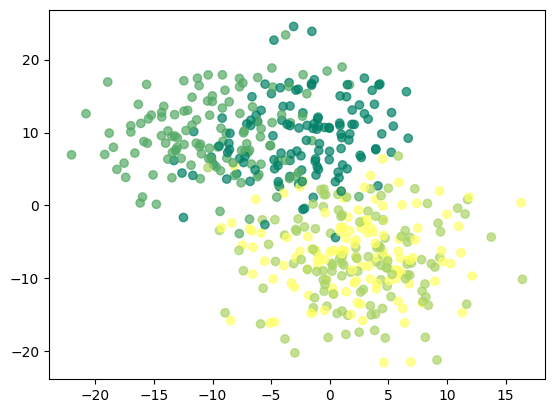

In [332]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='summer',alpha=0.7)
plt.show()

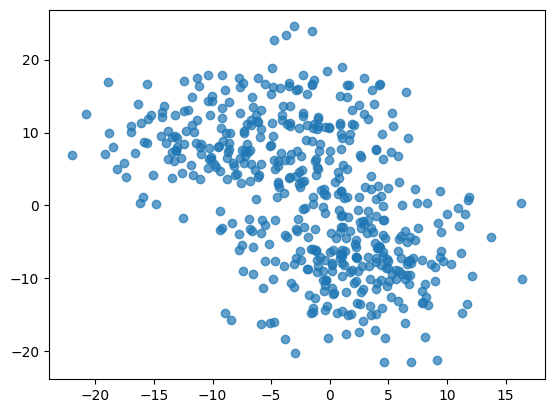

In [333]:
plt.scatter(X[:,0],X[:,1],alpha=0.7)
plt.show()

In [334]:
X.shape

(500, 10)

In [335]:
df_linear = pd.DataFrame(X) 

In [336]:
df_linear.columns = [f"vab_{col+1}" for col in df_linear.columns]

In [337]:
df_linear['target'] = y

In [338]:
df_linear

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  
0     3.817842  3.587400 -4.383650  -1.607136       1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3  
2    -9.302836  4.211802 -4.587759  -5.983203       1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2  
4    -5.886460 -4.564809  3.010796  -9.167377       3  
..         ...       ...       ...        ...     ...  
495  -7.168167  5.228464  2.771318  -7.182853       2  
496 -11.446325  5.395608  1.606887  -0.122200       2  
497   1.309891  0.903259  2.360404 -21.488913       2  
498  -5.524547  0.760455 -0.050439   7.297902       1  
499  -0.810328  6.438151  7.111254  -5.241037       3  

[500 rows x 11 columns]

In [339]:
df_linear['target'].value_counts()

target
1    125
3    125
2    125
0    125
Name: count, dtype: int64

In [340]:
# sns.pairplot(df_linear)

<Axes: ylabel='Density'>

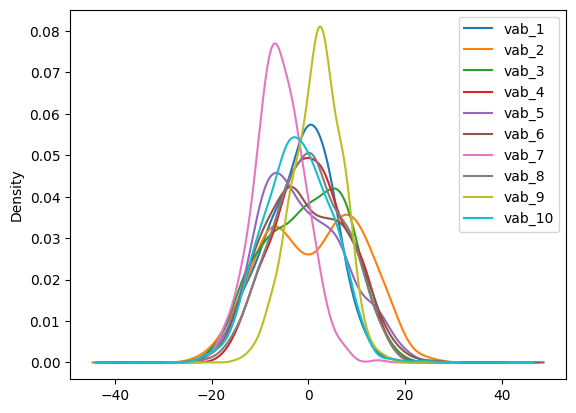

In [341]:
df_linear.iloc[:,:-1].plot(kind='density')

### correlation matrix

In [342]:
df_linear.iloc[:,:-1].corr()

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
vab_1   1.000000 -0.486942 -0.447335  0.350051  0.410801  0.452514 -0.075782   
vab_2  -0.486942  1.000000  0.613055 -0.308053 -0.535676 -0.660596 -0.042907   
vab_3  -0.447335  0.613055  1.000000 -0.404254 -0.585948 -0.588399 -0.045079   
vab_4   0.350051 -0.308053 -0.404254  1.000000  0.417966  0.273300 -0.042056   
vab_5   0.410801 -0.535676 -0.585948  0.417966  1.000000  0.522756  0.058207   
vab_6   0.452514 -0.660596 -0.588399  0.273300  0.522756  1.000000  0.006910   
vab_7  -0.075782 -0.042907 -0.045079 -0.042056  0.058207  0.006910  1.000000   
vab_8  -0.211216  0.442483  0.449298 -0.252915 -0.516129 -0.388445 -0.142480   
vab_9   0.229445 -0.203147 -0.257066  0.293808  0.230401  0.217423 -0.039972   
vab_10 -0.140779  0.347897  0.224178  0.237288 -0.100335 -0.325186 -0.116193   

           vab_8     vab_9    vab_10  
vab_1  -0.211216  0.229445 -0.140779  
vab_2   0.442483 -0.203147  0.347897  
vab_3   0.449298 -0.257066  0.224178  
vab_4  -0.252915  0.293808  0.237288  
vab_5  -0.516129  0.230401 -0.100335  
vab_6  -0.388445  0.217423 -0.325186  
vab_7  -0.142480 -0.039972 -0.116193  
vab_8   1.000000 -0.095332  0.161269  
vab_9  -0.095332  1.000000  0.032065  
vab_10  0.161269  0.032065  1.000000

<Axes: >

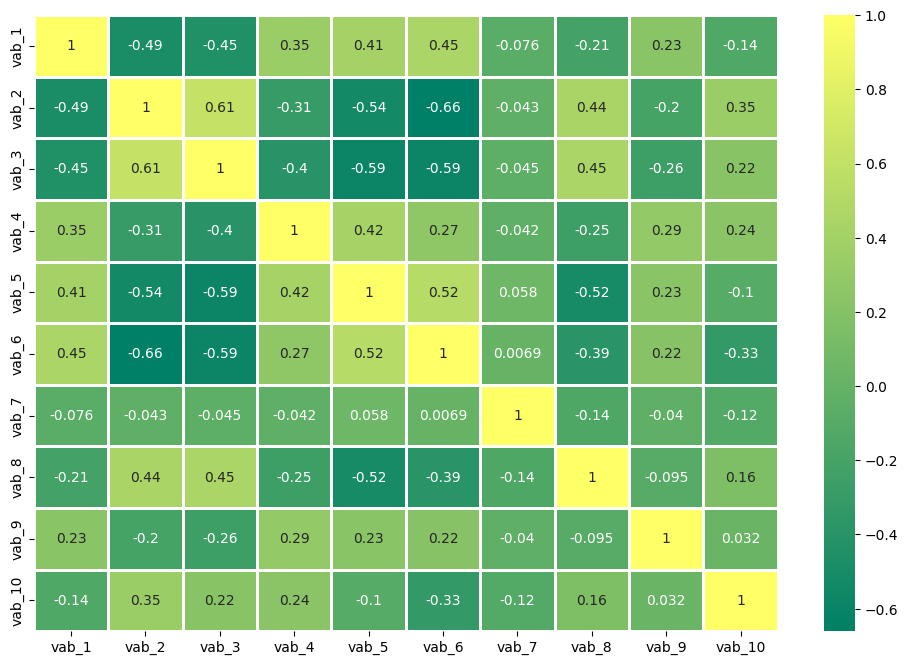

In [343]:
plt.figure(figsize=(12,8))
sns.heatmap(df_linear.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',
            linewidths=1)

### data standardization

In [344]:
X_values = df_linear.iloc[:,:-1].values

In [345]:
y_values = df_linear.iloc[:,-1].values

In [346]:
from sklearn.preprocessing import StandardScaler

In [347]:
scaler = StandardScaler()

In [348]:
X_values = scaler.fit_transform(X_values)

In [349]:
np.mean(X_values),np.std(X_values)

(-1.0373923942097463e-16, 1.0)

In [350]:
pd.DataFrame(X_values)

0         1         2         3         4         5         6  \
0   -0.576590  0.834881  1.268863  0.337453 -0.744489 -0.958663  1.865415   
1    0.129787 -0.976571 -0.857178 -0.361571  0.285170  0.370419 -0.423208   
2    0.056346  0.780833  0.767608 -1.674416 -0.989220 -0.552043 -0.656153   
3    0.201845  0.029735 -0.583080 -1.419291  0.579122 -0.194416  0.196365   
4    1.231941 -0.897840 -1.061697  1.034143  0.602032  0.288074  0.000416   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.842091 -0.275115  0.079701  0.498445  0.340091 -0.114117 -0.245907   
496  0.215592 -1.232573 -0.293184 -0.216777 -0.220106  0.738061 -1.068095   
497  1.566573 -0.985485 -1.074626 -1.811564 -0.887315  0.061809  1.383430   
498 -1.790237  1.175916  1.092213 -0.786994 -0.478104  0.297571  0.069969   
499 -0.927441 -0.367789 -1.089171  1.713849  0.990475  0.854217  0.975960   

            7         8         9  
0    0.469103 -1.225911  0.084795  
1   -0.887944 -0.445326 -1.022465  
2    0.553320 -1.266518 -0.552017  
3   -1.333457 -1.172165 -0.902074  
4   -0.630439  0.245180 -1.015383  
..        ...       ...       ...  
495  0.690444  0.197537 -0.726592  
496  0.712988 -0.034121  0.300886  
497  0.107075  0.115788 -2.808434  
498  0.087814 -0.363838  1.380671  
499  0.853602  1.060948 -0.444016  

[500 rows x 10 columns]

## pca application

In [351]:
from sklearn.decomposition import PCA

In [352]:
pca_general = PCA()

In [353]:
pca_general.fit(X_values)

PCA()

In [354]:
explained_variance = pca_general.explained_variance_ratio_

In [355]:
explained_variance

array([0.39005736, 0.14252111, 0.10563451, 0.08503339, 0.06946151,
       0.05063072, 0.0450599 , 0.04128391, 0.03772956, 0.03258804])

In [356]:
eigenvalues = pca_general.explained_variance_

In [357]:
pd.DataFrame(eigenvalues)

0
0  3.908390
1  1.428067
2  1.058462
3  0.852038
4  0.696007
5  0.507322
6  0.451502
7  0.413666
8  0.378052
9  0.326533

In [358]:
eigenvectors = pca_general.components_

### scree plot

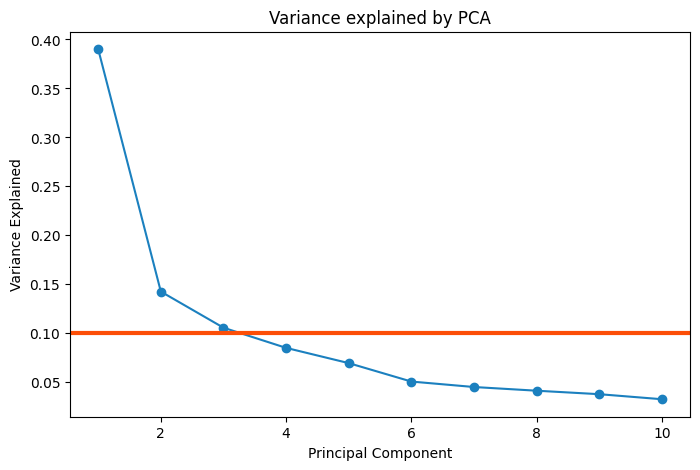

In [359]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [360]:
pca = PCA(n_components=2)

In [361]:
principal_components = pca.fit_transform(X_values)

In [362]:
pd.DataFrame(principal_components).head(8)

0         1
0  1.989103 -0.612637
1 -1.304821 -1.155632
2  2.036264 -1.229210
3 -0.403509 -1.872577
4 -2.248810 -0.115557
5 -1.989787  0.020806
6 -1.598013 -1.305250
7  1.636833 -1.410185

In [363]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [364]:
final_df = pd.concat([principal_df,df_linear[['target']]],axis = 1)

In [365]:
final_df

principal component 1  principal component 2  target
0                 1.989103              -0.612637       1
1                -1.304821              -1.155632       3
2                 2.036264              -1.229210       1
3                -0.403509              -1.872577       2
4                -2.248810              -0.115557       3
..                     ...                    ...     ...
495              -0.504194               0.132121       2
496              -0.548141               0.224845       2
497              -1.005734              -3.193659       2
498               2.115411               0.242176       1
499              -1.520633               0.524282       3

[500 rows x 3 columns]

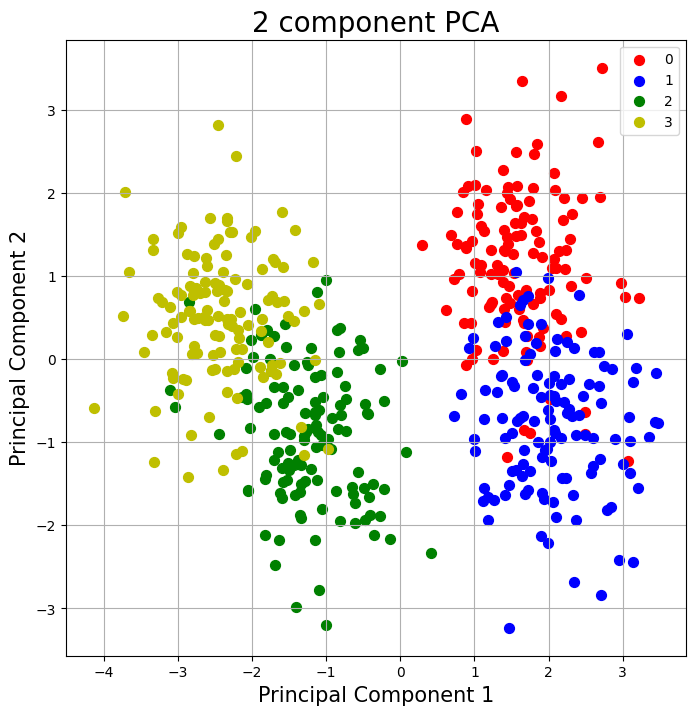

In [366]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

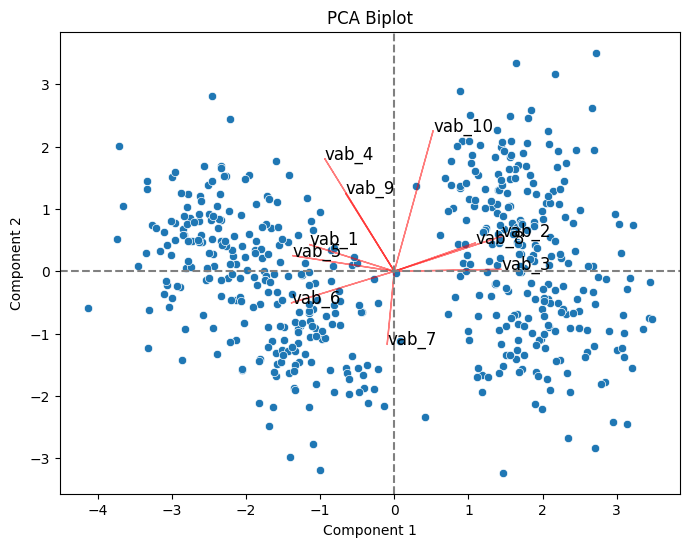

In [367]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_linear.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

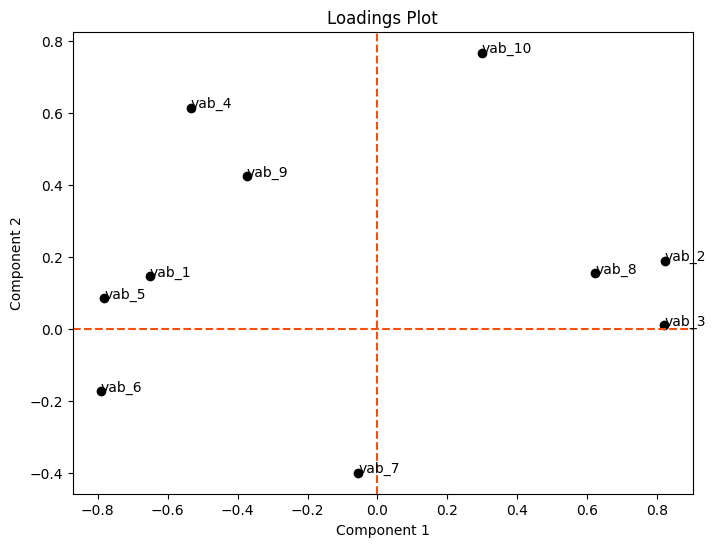

In [368]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_linear.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [369]:
scores_pca = pca.transform(X_values)

In [370]:
pd.DataFrame(scores_pca).head()

0         1
0  1.989103 -0.612637
1 -1.304821 -1.155632
2  2.036264 -1.229210
3 -0.403509 -1.872577
4 -2.248810 -0.115557

## t-SNE

In [371]:
from sklearn.manifold import TSNE

In [372]:
tsne = TSNE(n_components=2)

In [373]:
X_tsne = tsne.fit_transform(X_values)

In [374]:
tsne.kl_divergence_

0.9525728225708008

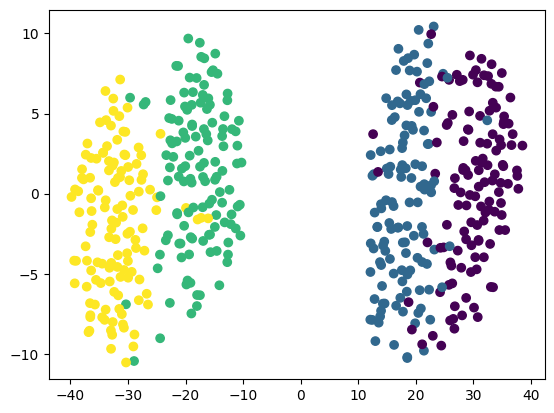

In [375]:
plt.scatter(x=X_tsne[:,0],y=X_tsne[:,1],c=y)
plt.show()

## clustering 

In [376]:
from sklearn.cluster import KMeans

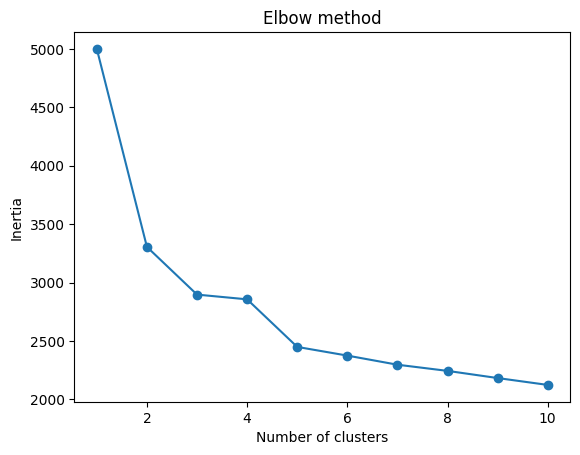

In [377]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [378]:
kmeans = KMeans(n_clusters=4)

In [379]:
kmeans.fit(X_values)

KMeans(n_clusters=4)

In [380]:
df_linear['k_means'] = kmeans.labels_

In [381]:
df_linear

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  
0     3.817842  3.587400 -4.383650  -1.607136       1        0  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        1  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3  
..         ...       ...       ...        ...     ...      ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        2  
496 -11.446325  5.395608  1.606887  -0.122200       2        2  
497   1.309891  0.903259  2.360404 -21.488913       2        1  
498  -5.524547  0.760455 -0.050439   7.297902       1        0  
499  -0.810328  6.438151  7.111254  -5.241037       3        3  

[500 rows x 12 columns]

In [382]:
from scipy.optimize import linear_sum_assignment

y_true = df_linear['target'].values  
y_kmeans = df_linear['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_linear['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_linear['k_means'] == y_true))

accuracy before: 0.61
accuracy after: 0.61


In [383]:
df_linear

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  
0     3.817842  3.587400 -4.383650  -1.607136       1        0  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        1  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3  
..         ...       ...       ...        ...     ...      ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        2  
496 -11.446325  5.395608  1.606887  -0.122200       2        2  
497   1.309891  0.903259  2.360404 -21.488913       2        1  
498  -5.524547  0.760455 -0.050439   7.297902       1        0  
499  -0.810328  6.438151  7.111254  -5.241037       3        3  

[500 rows x 12 columns]

In [384]:
print(np.unique(df_linear['target']))

[0 1 2 3]


In [385]:
print(np.unique(kmeans.labels_))

[0 1 2 3]


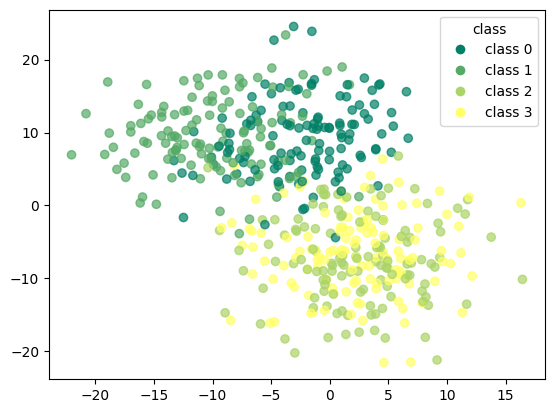

In [386]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_linear.iloc[:, 0], df_linear.iloc[:, 1], 
                      c=df_linear['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_linear['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

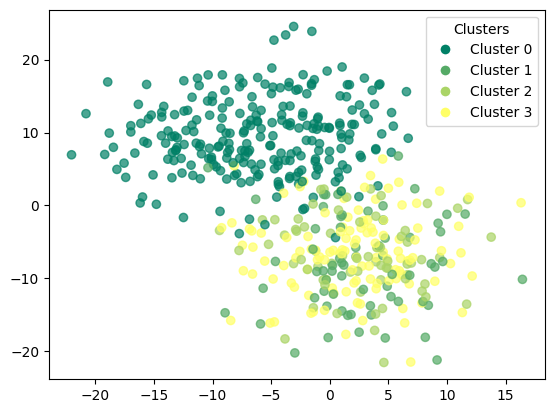

In [387]:
scatter = plt.scatter(df_linear.iloc[:, 0], df_linear.iloc[:, 1], 
                      c=df_linear['k_means'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_linear['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [388]:
kmeans.cluster_centers_

array([[-0.59907025,  0.83608028,  0.75557431, -0.36507269, -0.6865835 ,
        -0.77338999, -0.05302504,  0.53880595, -0.29006075,  0.42388959],
       [ 0.64809707, -0.95941222, -0.51277718, -0.20605365,  0.08964512,
         0.70170744,  0.74310423, -0.26860869,  0.02163356, -1.11113414],
       [ 0.62722873, -0.81101865, -0.48291813, -0.48354696,  0.22986521,
         0.88777592, -0.87733027,  0.15380382,  0.23626598, -0.88610878],
       [ 0.5566736 , -0.78261383, -1.03941566,  1.14769546,  1.26594823,
         0.74910339,  0.19208641, -1.0705292 ,  0.4665164 ,  0.20785295]])

In [389]:
print(confusion_matrix(df_linear['target'],df_linear['k_means']))

[[125   0   0   0]
 [125   0   0   0]
 [  0  58  64   3]
 [  0   7   2 116]]


In [390]:
print(classification_report(df_linear['target'],df_linear['k_means']))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       125
           1       0.00      0.00      0.00       125
           2       0.97      0.51      0.67       125
           3       0.97      0.93      0.95       125

    accuracy                           0.61       500
   macro avg       0.61      0.61      0.57       500
weighted avg       0.61      0.61      0.57       500



### clustering with pca

In [391]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

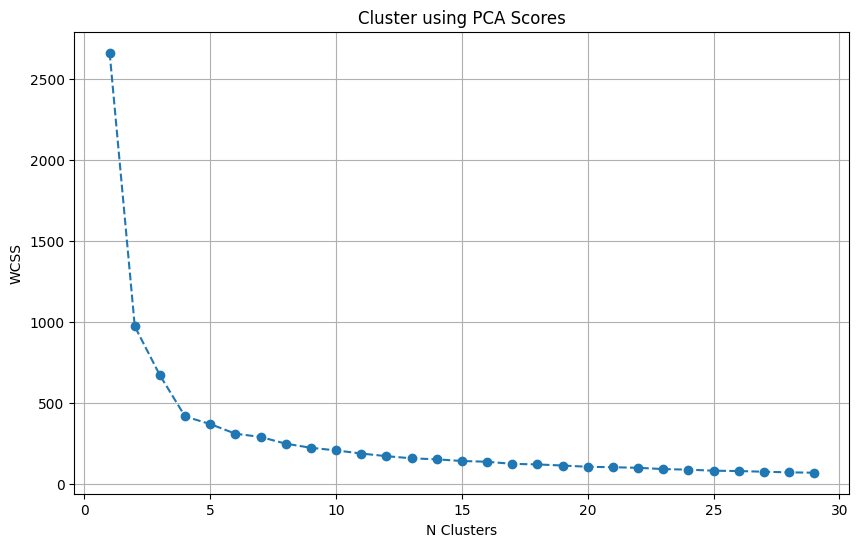

In [392]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [393]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++')

In [394]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4)

In [395]:
df_pca_kmeans = df_linear.copy()

In [396]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [397]:
df_pca_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  kmeans_pca  
0     3.817842  3.587400 -4.383650  -1.607136       1        0           1  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2           3  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0           1  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        1           3  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3           2  
..         ...       ...       ...        ...     ...      ...         ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        2           2  
496 -11.446325  5.395608  1.606887  -0.122200       2        2           2  
497   1.309891  0.903259  2.360404 -21.488913       2        1           3  
498  -5.524547  0.760455 -0.050439   7.297902       1        0           1  
499  -0.810328  6.438151  7.111254  -5.241037       3        3           2  

[500 rows x 13 columns]

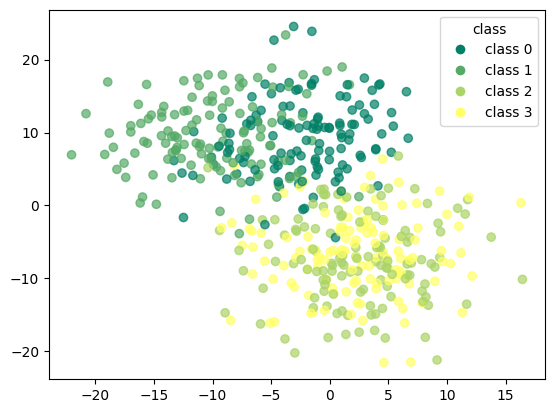

In [398]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

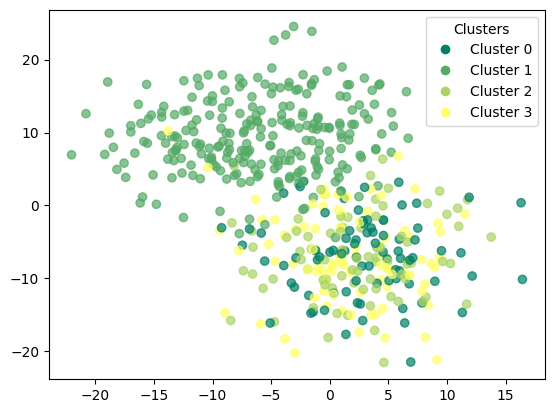

In [399]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [400]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.338
accuracy after: 0.576


In [401]:
df_pca_kmeans

vab_1      vab_2      vab_3      vab_4     vab_5     vab_6  \
0    -5.915826   9.415179  10.238744   2.932082 -7.560789 -8.384469   
1    -1.011345  -8.364777  -7.523082  -2.183446  1.108751  2.778589   
2    -1.521256   8.884683   6.051055 -11.790977 -9.621378 -4.969239   
3    -0.511033   1.512426  -5.233148  -9.923943  3.583774 -1.965502   
4     6.641074  -7.592013  -9.231718   8.030529  3.776678  2.086960   
..         ...        ...        ...        ...       ...       ...   
495   3.934286  -1.479775   0.303991   4.110236  1.571178 -1.291063   
496  -0.415591 -10.877519  -2.811240  -1.123830 -3.145576  5.866439   
497   8.964476  -8.452273  -9.339726 -12.794640 -8.763353  0.186548   
498 -14.342360  12.762542   8.762939  -5.296737 -5.317876  2.166731   
499  -8.351839  -2.389400  -9.461241  13.004682  7.047293  6.842037   

         vab_7     vab_8     vab_9     vab_10  target  k_means  kmeans_pca  
0     3.817842  3.587400 -4.383650  -1.607136       1        0           0  
1    -8.090733 -6.473995 -0.460039  -9.216038       3        2           2  
2    -9.302836  4.211802 -4.587759  -5.983203       1        0           0  
3    -4.866862 -9.777110 -4.113496  -8.388731       2        1           2  
4    -5.886460 -4.564809  3.010796  -9.167377       3        3           1  
..         ...       ...       ...        ...     ...      ...         ...  
495  -7.168167  5.228464  2.771318  -7.182853       2        2           1  
496 -11.446325  5.395608  1.606887  -0.122200       2        2           1  
497   1.309891  0.903259  2.360404 -21.488913       2        1           2  
498  -5.524547  0.760455 -0.050439   7.297902       1        0           0  
499  -0.810328  6.438151  7.111254  -5.241037       3        3           1  

[500 rows x 13 columns]

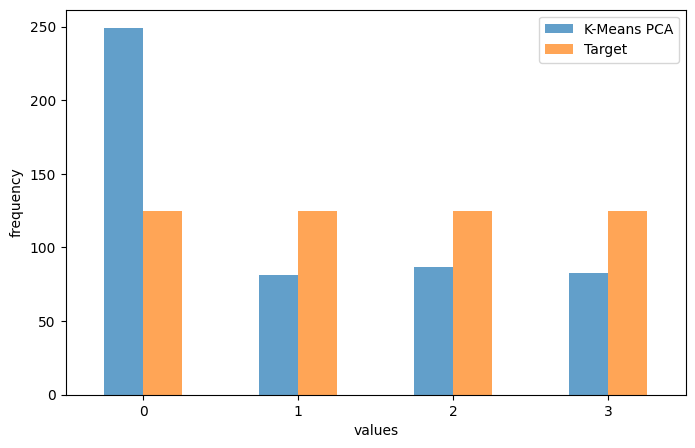

In [402]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [403]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[125   0   0   0]
 [124   0   1   0]
 [  0  41  82   2]
 [  0  40   4  81]]


In [404]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       125
           1       0.00      0.00      0.00       125
           2       0.94      0.66      0.77       125
           3       0.98      0.65      0.78       125

    accuracy                           0.58       500
   macro avg       0.61      0.58      0.56       500
weighted avg       0.61      0.58      0.56       500



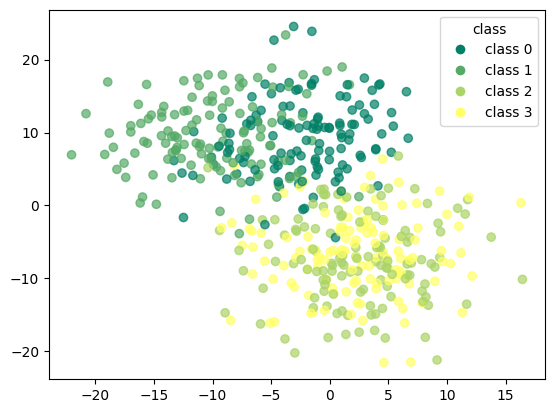

In [405]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

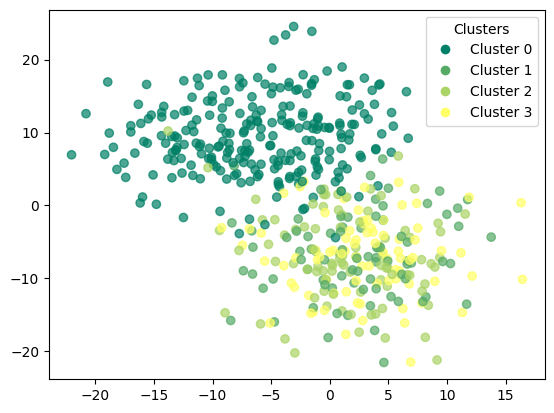

In [406]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

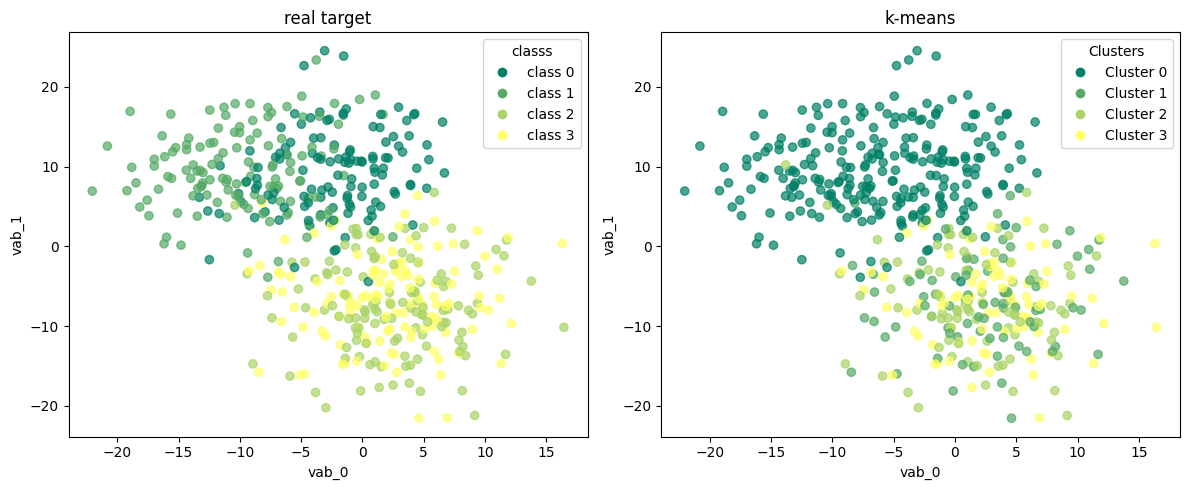

In [407]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

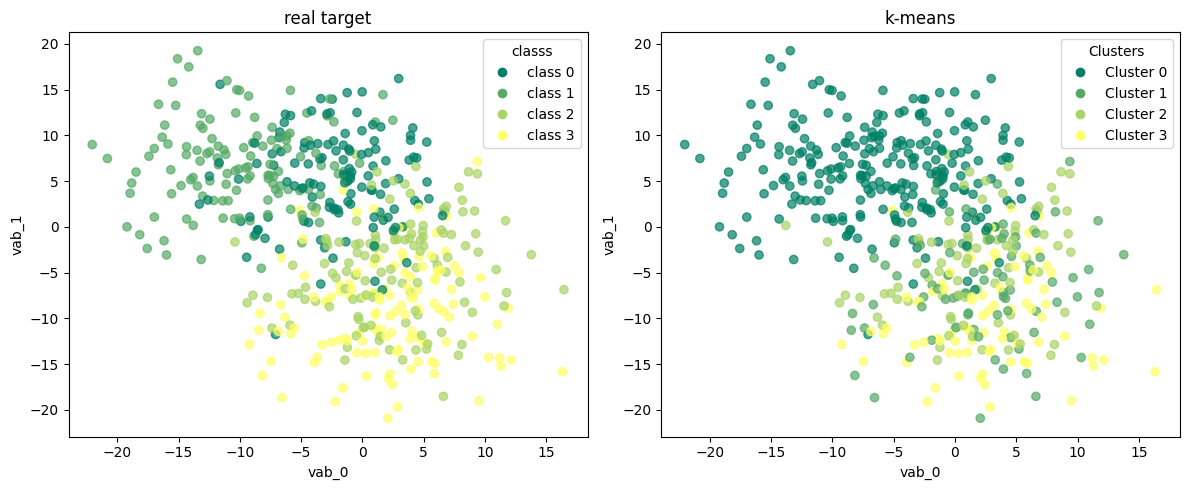

In [408]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

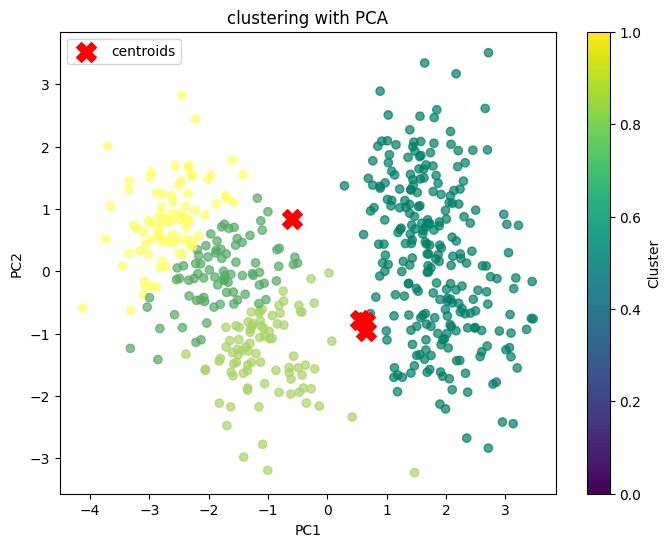

In [409]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

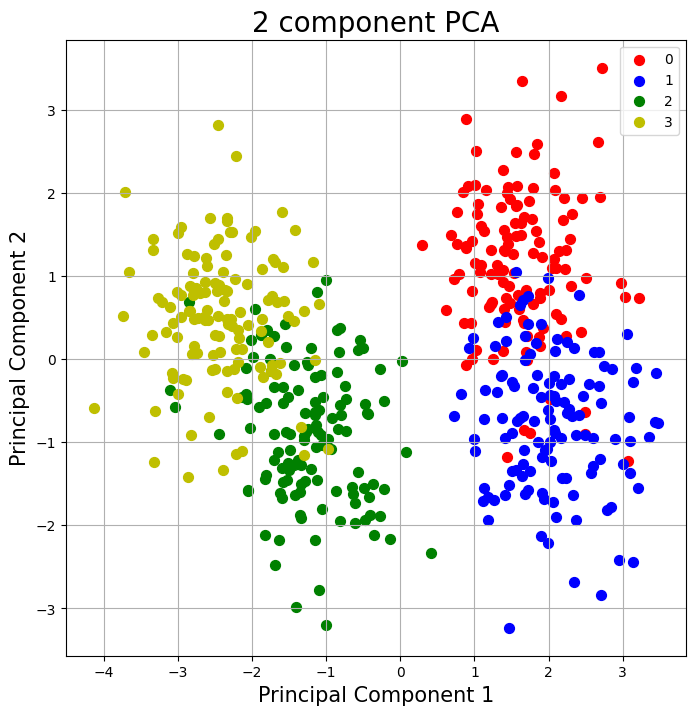

In [410]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1,2,3]
colors = ['r','b','g','y']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

# non linear dataset - moons

In [411]:
X,y = make_moons(n_samples=500,noise=0.3, random_state=42)

num_extra_features = 8
extra_features = np.random.normal(scale=0.3,size=(X.shape[0],num_extra_features))  
X_extended = np.hstack((X,extra_features))

df_moons = pd.DataFrame(X_extended,columns=[f"vab_{i+1}" for i in range(X_extended.shape[1])])
df_moons["target"] = y

In [412]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749 -0.359918  0.209676 -0.122940  0.235008 -0.441147   
1    1.185064  0.920387 -0.192324  0.197716  0.308068  0.179873  0.485636   
2    1.164022 -0.455526 -0.181547  0.273126  0.472120  0.137006 -0.448848   
3   -0.023656  1.086288  0.023872  0.227647  0.208897  0.083640 -0.062601   
4    0.480503  1.509424 -0.077190  0.324634 -0.038710 -0.255499 -0.227691   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.020672 -0.039781  0.353100 -0.393740  0.160917   
496  0.274530 -0.142661  0.234583 -0.019623 -0.004051 -0.332020 -0.089908   
497  0.182398  0.029661  0.398938 -0.502674 -0.241956  0.503160 -0.130542   
498  1.260173 -0.589217 -0.250761 -0.328761  0.830512 -0.075466 -0.577670   
499 -0.026649  1.583960 -0.279936  0.202042 -0.074075 -0.577793  0.536172   

        vab_8     vab_9    vab_10  target  
0   -0.378831 -0.232762  0.023689       1  
1    0.124748 -0.365069  0.409013       0  
2   -0.275464  0.396823 -0.050737       1  
3   -0.093801  0.257370  0.166071       0  
4   -0.293622 -0.081723  0.370117       0  
..        ...       ...       ...     ...  
495 -0.501344 -0.251509 -0.363797       0  
496 -0.229040  0.115037 -0.297327       1  
497 -0.394464  0.065721 -0.142618       1  
498  0.448113  0.183321 -0.229940       1  
499 -0.130197  0.448672  0.383530       0  

[500 rows x 11 columns]

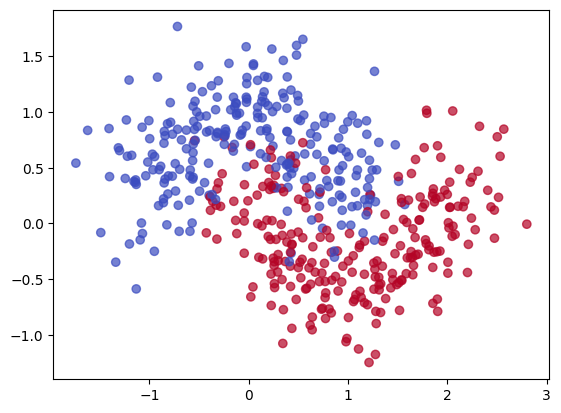

In [413]:
plt.scatter(df_moons.iloc[:,0],df_moons.iloc[:, 1],c=y,cmap='coolwarm',alpha=0.7)
plt.show()

In [414]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749 -0.359918  0.209676 -0.122940  0.235008 -0.441147   
1    1.185064  0.920387 -0.192324  0.197716  0.308068  0.179873  0.485636   
2    1.164022 -0.455526 -0.181547  0.273126  0.472120  0.137006 -0.448848   
3   -0.023656  1.086288  0.023872  0.227647  0.208897  0.083640 -0.062601   
4    0.480503  1.509424 -0.077190  0.324634 -0.038710 -0.255499 -0.227691   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.020672 -0.039781  0.353100 -0.393740  0.160917   
496  0.274530 -0.142661  0.234583 -0.019623 -0.004051 -0.332020 -0.089908   
497  0.182398  0.029661  0.398938 -0.502674 -0.241956  0.503160 -0.130542   
498  1.260173 -0.589217 -0.250761 -0.328761  0.830512 -0.075466 -0.577670   
499 -0.026649  1.583960 -0.279936  0.202042 -0.074075 -0.577793  0.536172   

        vab_8     vab_9    vab_10  target  
0   -0.378831 -0.232762  0.023689       1  
1    0.124748 -0.365069  0.409013       0  
2   -0.275464  0.396823 -0.050737       1  
3   -0.093801  0.257370  0.166071       0  
4   -0.293622 -0.081723  0.370117       0  
..        ...       ...       ...     ...  
495 -0.501344 -0.251509 -0.363797       0  
496 -0.229040  0.115037 -0.297327       1  
497 -0.394464  0.065721 -0.142618       1  
498  0.448113  0.183321 -0.229940       1  
499 -0.130197  0.448672  0.383530       0  

[500 rows x 11 columns]

### correlation matrix

In [415]:
df_moons.iloc[:,:-1].corr()

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
vab_1   1.000000 -0.357584 -0.009604  0.051348 -0.005055 -0.061564 -0.008730   
vab_2  -0.357584  1.000000  0.049241 -0.076547 -0.030870  0.048829  0.050234   
vab_3  -0.009604  0.049241  1.000000 -0.032577 -0.040141  0.009906 -0.065470   
vab_4   0.051348 -0.076547 -0.032577  1.000000 -0.045335 -0.106694 -0.070826   
vab_5  -0.005055 -0.030870 -0.040141 -0.045335  1.000000 -0.041900 -0.132826   
vab_6  -0.061564  0.048829  0.009906 -0.106694 -0.041900  1.000000 -0.041959   
vab_7  -0.008730  0.050234 -0.065470 -0.070826 -0.132826 -0.041959  1.000000   
vab_8  -0.001480  0.073441 -0.035888 -0.087301  0.056779  0.076308 -0.015358   
vab_9  -0.040035  0.076728 -0.011024  0.039049 -0.013995 -0.075634  0.000447   
vab_10  0.053358 -0.038100  0.039790 -0.039757 -0.047702 -0.020426  0.056808   

           vab_8     vab_9    vab_10  
vab_1  -0.001480 -0.040035  0.053358  
vab_2   0.073441  0.076728 -0.038100  
vab_3  -0.035888 -0.011024  0.039790  
vab_4  -0.087301  0.039049 -0.039757  
vab_5   0.056779 -0.013995 -0.047702  
vab_6   0.076308 -0.075634 -0.020426  
vab_7  -0.015358  0.000447  0.056808  
vab_8   1.000000  0.067835  0.025850  
vab_9   0.067835  1.000000 -0.032027  
vab_10  0.025850 -0.032027  1.000000

<Axes: >

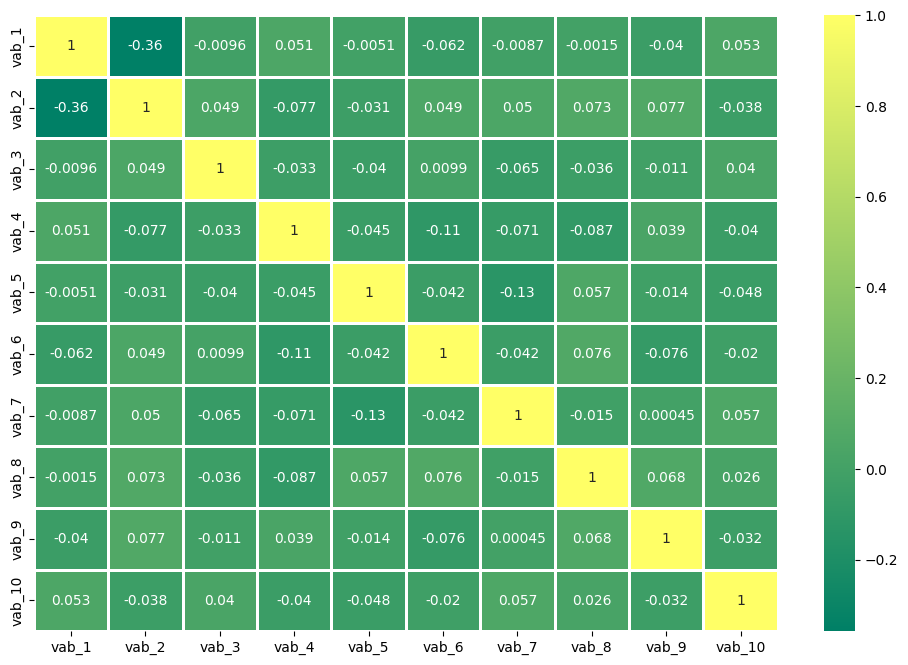

In [416]:
plt.figure(figsize=(12,8))
sns.heatmap(df_moons.iloc[:,:-1].corr(),cmap='summer',annot=True,linecolor='white',linewidths=1)

### data standardization

In [417]:
X_values = df_moons.iloc[:,:-1].values

In [418]:
y_values = df_moons.iloc[:,-1].values

In [419]:
from sklearn.preprocessing import StandardScaler

In [420]:
scaler = StandardScaler()

In [421]:
X_values = scaler.fit_transform(X_values)

In [422]:
np.mean(X_values),np.std(X_values)

(-6.252776074688882e-17, 1.0)

In [423]:
pd.DataFrame(X_values)

0         1         2         3         4         5         6  \
0    0.327883 -0.868825 -1.120705  0.790354 -0.417811  0.772605 -1.397195   
1    0.709945  1.113499 -0.582391  0.748495  1.012666  0.588356  1.517822   
2    0.687237 -1.199639 -0.547773  1.012432  1.557138  0.445103 -1.421417   
3   -0.594500  1.392407  0.112039  0.853255  0.683525  0.266763 -0.206551   
4   -0.050414  2.103769 -0.212575  1.192714 -0.138259 -0.866574 -0.725812   
..        ...       ...       ...       ...       ...       ...       ...   
495 -0.264600  1.328634  0.101760 -0.082762  1.162122 -1.328551  0.496480   
496 -0.272699 -0.673661  0.788848 -0.012207 -0.023228 -1.122293 -0.292441   
497 -0.372128 -0.383959  1.316764 -1.702918 -0.812812  1.668720 -0.420246   
498  0.791003 -1.424397 -0.770091 -1.094211  2.746605 -0.264938 -1.826603   
499 -0.597731  2.229076 -0.863801  0.763634 -0.255633 -1.943622  1.676773   

            7         8         9  
0   -1.189139 -0.740107  0.062064  
1    0.445344 -1.165281  1.286048  
2   -0.853636  1.283104 -0.174351  
3   -0.264006  0.834962  0.514340  
4   -0.912574 -0.254733  1.162495  
..        ...       ...       ...  
495 -1.586784 -0.800348 -1.168789  
496 -0.702956  0.377566 -0.957648  
497 -1.239878  0.219089 -0.466211  
498  1.494901  0.597003 -0.743591  
499 -0.382140  1.449721  1.205102  

[500 rows x 10 columns]

## pca application

In [424]:
from sklearn.decomposition import PCA

In [425]:
pca_general = PCA()

In [426]:
pca_general.fit(X_values)

PCA()

In [427]:
explained_variance = pca_general.explained_variance_ratio_

In [428]:
explained_variance

array([0.14457136, 0.11793467, 0.11678099, 0.10875854, 0.10304   ,
       0.09759229, 0.09060411, 0.08267352, 0.07546825, 0.06257627])

In [429]:
eigenvalues = pca_general.explained_variance_

In [430]:
pd.DataFrame(eigenvalues)

0
0  1.448611
1  1.181710
2  1.170150
3  1.089765
4  1.032465
5  0.977879
6  0.907857
7  0.828392
8  0.756195
9  0.627017

In [431]:
eigenvectors = pca_general.components_

### scree plot

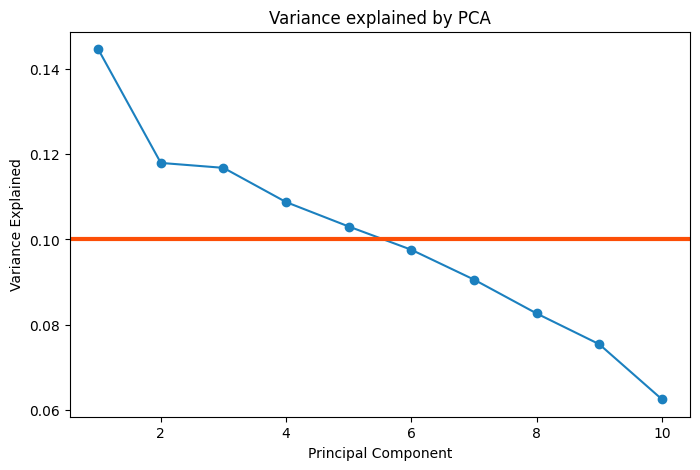

In [432]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [433]:
pca = PCA(n_components=2)

In [434]:
principal_components = pca.fit_transform(X_values)

In [435]:
pd.DataFrame(principal_components).head(8)

0         1
0 -1.337219 -0.475643
1  0.087197  0.833425
2 -1.558998 -2.055197
3  1.074990 -0.468282
4  0.462253  0.229715
5 -1.790019 -0.304347
6 -0.581141 -0.251936
7  2.077931  0.404488

In [436]:
principal_df = pd.DataFrame(data = principal_components,columns = ['principal component 1','principal component 2'])

In [437]:
final_df = pd.concat([principal_df,df_moons[['target']]],axis = 1)

In [438]:
final_df

principal component 1  principal component 2  target
0                -1.337219              -0.475643       1
1                 0.087197               0.833425       0
2                -1.558998              -2.055197       1
3                 1.074990              -0.468282       0
4                 0.462253               0.229715       0
..                     ...                    ...     ...
495               0.417062              -0.412564       0
496              -0.497668              -0.420714       1
497               0.733278               0.463965       1
498              -1.012675              -3.397048       1
499               1.252044               1.537853       0

[500 rows x 3 columns]

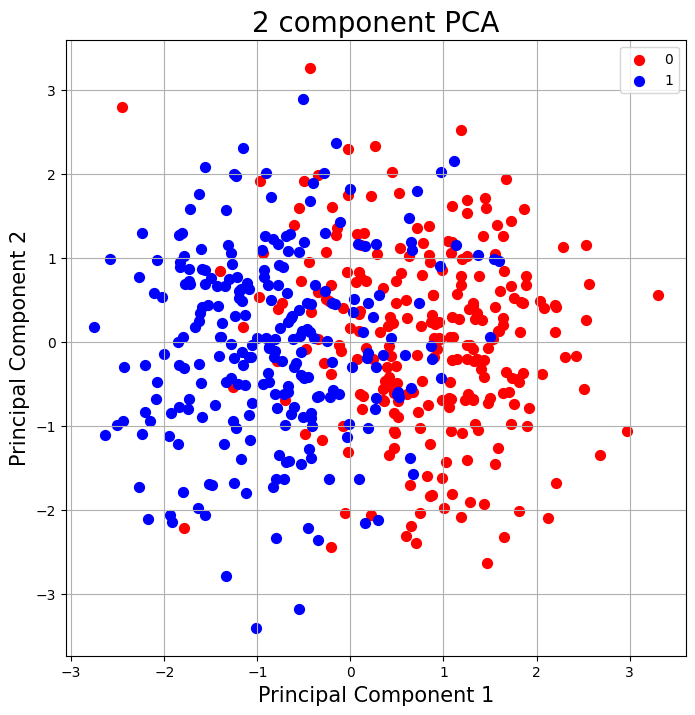

In [439]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

### biplot

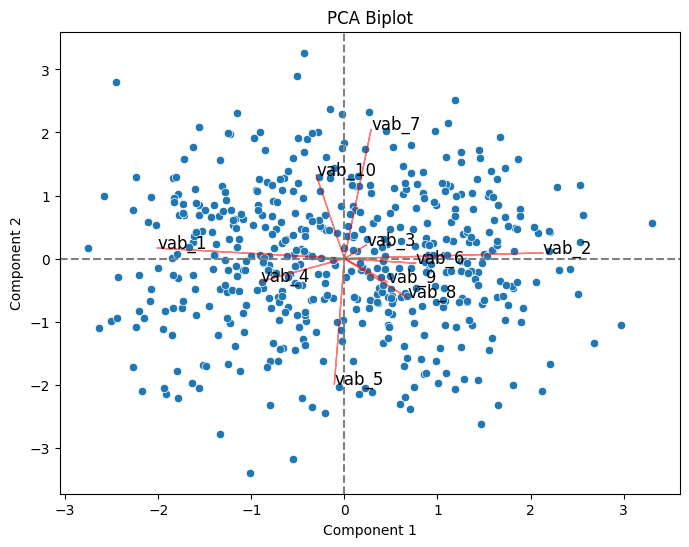

In [440]:
scores = pca.transform(X_values)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scores[:, 0], y=scores[:, 1])
for i, col in enumerate(df_moons.iloc[:,:-1].columns):
    plt.arrow(0, 0, eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), color='r', alpha=0.5)
    plt.text(eigenvectors[0, i] * max(scores[:, 0]), eigenvectors[1, i] * max(scores[:, 1]), col, fontsize=12)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA Biplot')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

### loading plot

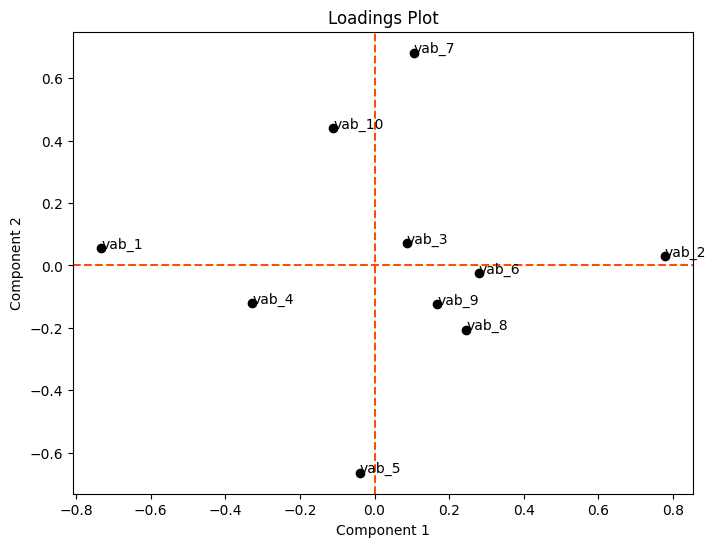

In [441]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
plt.figure(figsize=(8, 6))
plt.scatter(loadings[:, 0], loadings[:, 1], color='black')
for i, txt in enumerate(df_moons.iloc[:,:-1].columns):
    plt.text(loadings[i, 0], loadings[i, 1], txt, fontsize=10)
plt.axhline(0, color='#FC4E07', linestyle='--')
plt.axvline(0, color='#FC4E07', linestyle='--')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Loadings Plot')
plt.show()

### scores

In [442]:
scores_pca = pca.transform(X_values)

In [443]:
pd.DataFrame(scores_pca).head()

0         1
0 -1.337219 -0.475643
1  0.087197  0.833425
2 -1.558998 -2.055197
3  1.074990 -0.468282
4  0.462253  0.229715

## t-SNE

In [444]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_values)

In [445]:
tsne_data = np.vstack((X_tsne.T,df_moons['target'])).T

In [446]:
tsne_df = pd.DataFrame(data=tsne_data,columns=('dim_1','dim_2','target'))

In [447]:
tsne_df

dim_1      dim_2  target
0     2.979301  -5.393124     1.0
1     5.756116   1.811543     0.0
2    -5.487622  -5.193026     1.0
3    -7.799177   5.893313     0.0
4     7.616391   7.221441     0.0
..         ...        ...     ...
495   1.539590  15.280056     0.0
496  -3.779178  -0.076924     1.0
497   2.253094   1.774905     1.0
498  -7.970615 -13.918686     1.0
499 -10.615621   2.645202     0.0

[500 rows x 3 columns]

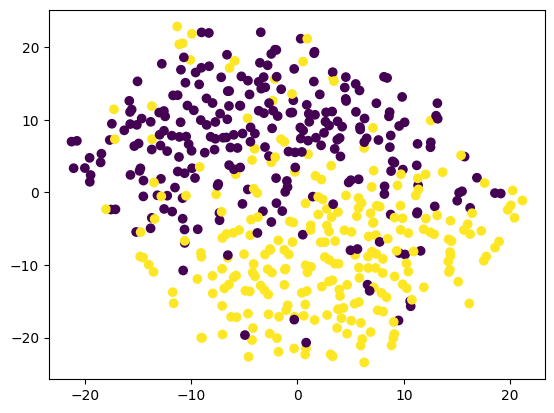

In [451]:
plt.scatter(x=tsne_df['dim_1'],y=tsne_df['dim_2'],c=tsne_df['target'])
plt.show()

In [276]:
tsne.kl_divergence_

1.5725606679916382

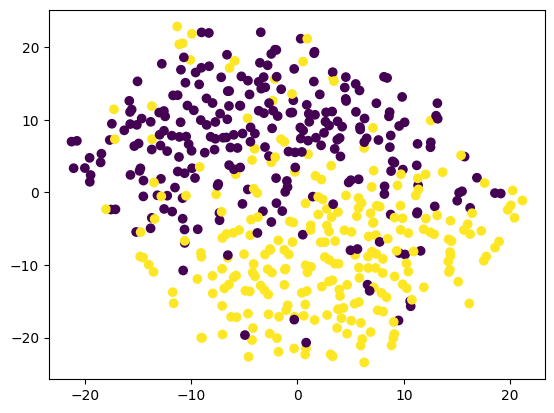

In [277]:
plt.scatter(x=X_tsne[:, 0],y=X_tsne[:, 1],c=y)

## clustering 

In [278]:
from sklearn.cluster import KMeans

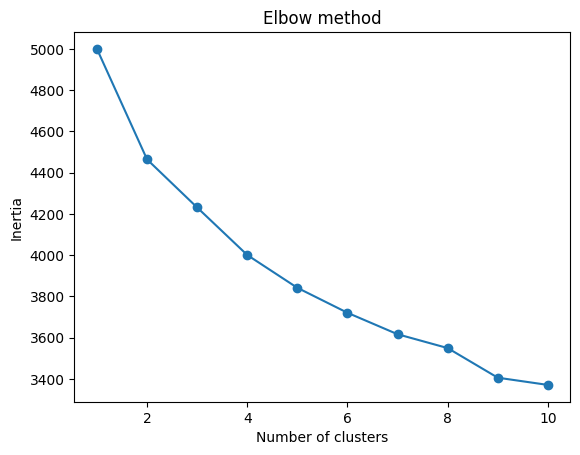

In [279]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_values)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [280]:
kmeans = KMeans(n_clusters=2)

In [281]:
kmeans.fit(X_values)

KMeans(n_clusters=2)

In [282]:
df_moons['k_means'] = kmeans.labels_

In [283]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749 -0.359918  0.209676 -0.122940  0.235008 -0.441147   
1    1.185064  0.920387 -0.192324  0.197716  0.308068  0.179873  0.485636   
2    1.164022 -0.455526 -0.181547  0.273126  0.472120  0.137006 -0.448848   
3   -0.023656  1.086288  0.023872  0.227647  0.208897  0.083640 -0.062601   
4    0.480503  1.509424 -0.077190  0.324634 -0.038710 -0.255499 -0.227691   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.020672 -0.039781  0.353100 -0.393740  0.160917   
496  0.274530 -0.142661  0.234583 -0.019623 -0.004051 -0.332020 -0.089908   
497  0.182398  0.029661  0.398938 -0.502674 -0.241956  0.503160 -0.130542   
498  1.260173 -0.589217 -0.250761 -0.328761  0.830512 -0.075466 -0.577670   
499 -0.026649  1.583960 -0.279936  0.202042 -0.074075 -0.577793  0.536172   

        vab_8     vab_9    vab_10  target  k_means  
0   -0.378831 -0.232762  0.023689       1        0  
1    0.124748 -0.365069  0.409013       0        0  
2   -0.275464  0.396823 -0.050737       1        0  
3   -0.093801  0.257370  0.166071       0        1  
4   -0.293622 -0.081723  0.370117       0        1  
..        ...       ...       ...     ...      ...  
495 -0.501344 -0.251509 -0.363797       0        1  
496 -0.229040  0.115037 -0.297327       1        0  
497 -0.394464  0.065721 -0.142618       1        1  
498  0.448113  0.183321 -0.229940       1        0  
499 -0.130197  0.448672  0.383530       0        1  

[500 rows x 12 columns]

In [284]:
from scipy.optimize import linear_sum_assignment

y_true = df_moons['target'].values  
y_kmeans = df_moons['k_means'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_moons['k_means'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_moons['k_means'] == y_true))

accuracy before: 0.172
accuracy after: 0.828


In [285]:
df_moons

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749 -0.359918  0.209676 -0.122940  0.235008 -0.441147   
1    1.185064  0.920387 -0.192324  0.197716  0.308068  0.179873  0.485636   
2    1.164022 -0.455526 -0.181547  0.273126  0.472120  0.137006 -0.448848   
3   -0.023656  1.086288  0.023872  0.227647  0.208897  0.083640 -0.062601   
4    0.480503  1.509424 -0.077190  0.324634 -0.038710 -0.255499 -0.227691   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.020672 -0.039781  0.353100 -0.393740  0.160917   
496  0.274530 -0.142661  0.234583 -0.019623 -0.004051 -0.332020 -0.089908   
497  0.182398  0.029661  0.398938 -0.502674 -0.241956  0.503160 -0.130542   
498  1.260173 -0.589217 -0.250761 -0.328761  0.830512 -0.075466 -0.577670   
499 -0.026649  1.583960 -0.279936  0.202042 -0.074075 -0.577793  0.536172   

        vab_8     vab_9    vab_10  target  k_means  
0   -0.378831 -0.232762  0.023689       1        1  
1    0.124748 -0.365069  0.409013       0        1  
2   -0.275464  0.396823 -0.050737       1        1  
3   -0.093801  0.257370  0.166071       0        0  
4   -0.293622 -0.081723  0.370117       0        0  
..        ...       ...       ...     ...      ...  
495 -0.501344 -0.251509 -0.363797       0        0  
496 -0.229040  0.115037 -0.297327       1        1  
497 -0.394464  0.065721 -0.142618       1        0  
498  0.448113  0.183321 -0.229940       1        1  
499 -0.130197  0.448672  0.383530       0        0  

[500 rows x 12 columns]

In [286]:
print(np.unique(df_moons['target']))

[0 1]


In [287]:
print(np.unique(kmeans.labels_))

[0 1]


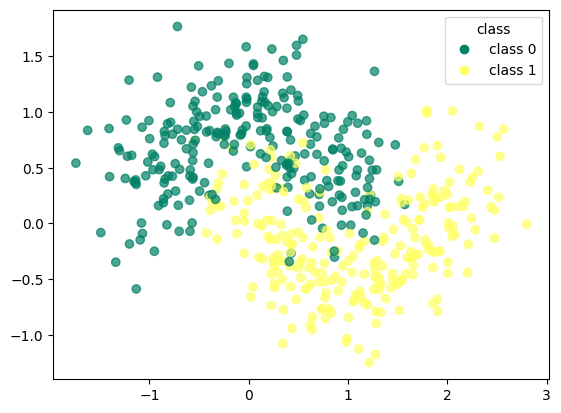

In [288]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], 
                      c=df_moons['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_moons['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                        for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

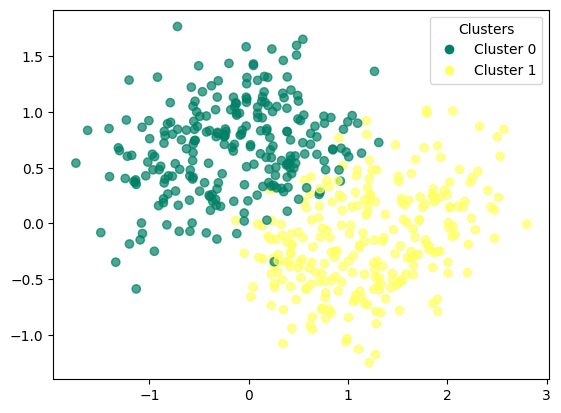

In [289]:
scatter = plt.scatter(df_moons.iloc[:, 0], df_moons.iloc[:, 1], 
                      c=df_moons['k_means'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_moons['k_means'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [290]:
kmeans.cluster_centers_

array([[ 0.71984196, -0.68051856,  0.01172387,  0.12851203, -0.02292283,
        -0.05886733,  0.00684976, -0.09958085, -0.10412436,  0.12307231],
       [-0.74325145,  0.70264924, -0.01210513, -0.13269129,  0.02366829,
         0.06078172, -0.00707252,  0.10281926,  0.10751052, -0.12707466]])

In [291]:
print(confusion_matrix(df_moons['target'],df_moons['k_means']))

[[205  45]
 [ 41 209]]


In [292]:
print(classification_report(df_moons['target'],df_moons['k_means']))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       250
           1       0.82      0.84      0.83       250

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



### clustering with pca

In [293]:
WCSS = []

for i in range(1,30):
  kmeans_pca = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  kmeans_pca.fit(scores_pca)
  WCSS.append(kmeans_pca.inertia_)

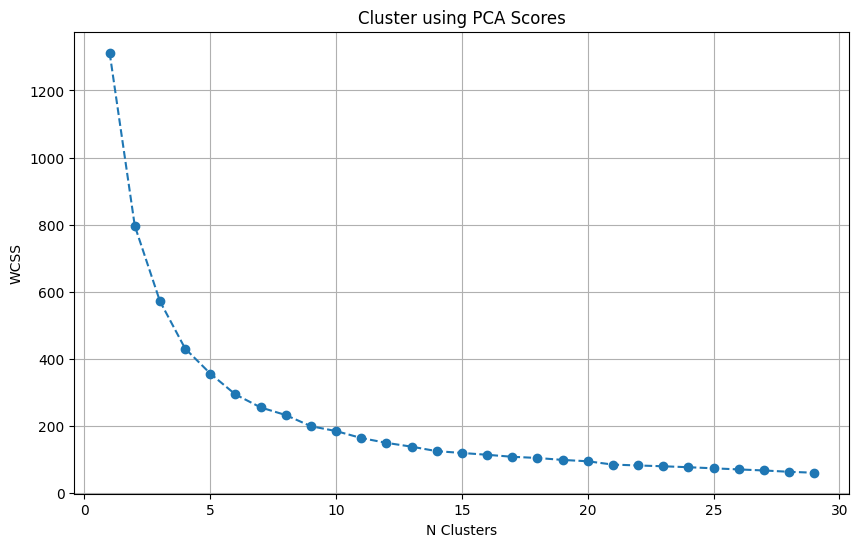

In [294]:
plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

In [295]:
kmeans_pca = KMeans(n_clusters=2,init='k-means++')

In [296]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2)

In [297]:
df_pca_kmeans = df_moons.copy()

In [298]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [299]:
df_pca_kmeans

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749 -0.359918  0.209676 -0.122940  0.235008 -0.441147   
1    1.185064  0.920387 -0.192324  0.197716  0.308068  0.179873  0.485636   
2    1.164022 -0.455526 -0.181547  0.273126  0.472120  0.137006 -0.448848   
3   -0.023656  1.086288  0.023872  0.227647  0.208897  0.083640 -0.062601   
4    0.480503  1.509424 -0.077190  0.324634 -0.038710 -0.255499 -0.227691   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.020672 -0.039781  0.353100 -0.393740  0.160917   
496  0.274530 -0.142661  0.234583 -0.019623 -0.004051 -0.332020 -0.089908   
497  0.182398  0.029661  0.398938 -0.502674 -0.241956  0.503160 -0.130542   
498  1.260173 -0.589217 -0.250761 -0.328761  0.830512 -0.075466 -0.577670   
499 -0.026649  1.583960 -0.279936  0.202042 -0.074075 -0.577793  0.536172   

        vab_8     vab_9    vab_10  target  k_means  kmeans_pca  
0   -0.378831 -0.232762  0.023689       1        1           0  
1    0.124748 -0.365069  0.409013       0        1           1  
2   -0.275464  0.396823 -0.050737       1        1           0  
3   -0.093801  0.257370  0.166071       0        0           1  
4   -0.293622 -0.081723  0.370117       0        0           1  
..        ...       ...       ...     ...      ...         ...  
495 -0.501344 -0.251509 -0.363797       0        0           1  
496 -0.229040  0.115037 -0.297327       1        1           0  
497 -0.394464  0.065721 -0.142618       1        0           1  
498  0.448113  0.183321 -0.229940       1        1           0  
499 -0.130197  0.448672  0.383530       0        0           1  

[500 rows x 13 columns]

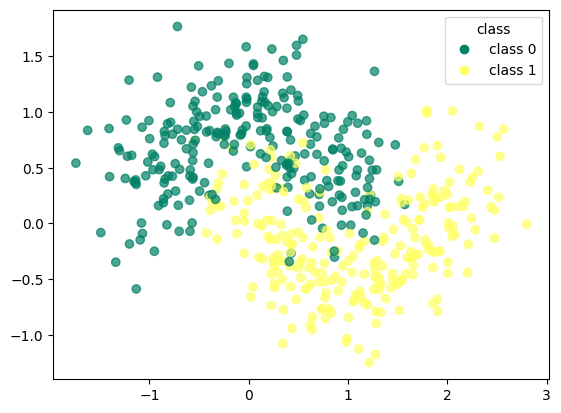

In [300]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

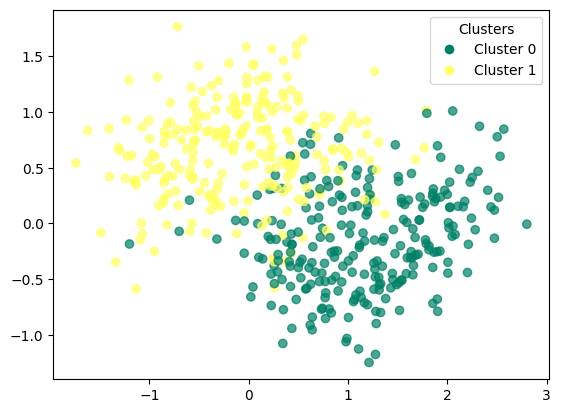

In [301]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [302]:
y_true = df_pca_kmeans['target'].values  
y_kmeans = df_pca_kmeans['kmeans_pca'].values  

conf_matrix = confusion_matrix(y_true, y_kmeans)

row_ind, col_ind = linear_sum_assignment(-conf_matrix)  

mapping = {old: new for old, new in zip(col_ind, row_ind)}
df_pca_kmeans['kmeans_pca'] = np.array([mapping[label] for label in y_kmeans])

print("accuracy before:", np.mean(y_kmeans == y_true))
print("accuracy after:", np.mean(df_pca_kmeans['kmeans_pca'] == y_true))

accuracy before: 0.178
accuracy after: 0.822


In [303]:
df_pca_kmeans

vab_1     vab_2     vab_3     vab_4     vab_5     vab_6     vab_7  \
0    0.831039 -0.258749 -0.359918  0.209676 -0.122940  0.235008 -0.441147   
1    1.185064  0.920387 -0.192324  0.197716  0.308068  0.179873  0.485636   
2    1.164022 -0.455526 -0.181547  0.273126  0.472120  0.137006 -0.448848   
3   -0.023656  1.086288  0.023872  0.227647  0.208897  0.083640 -0.062601   
4    0.480503  1.509424 -0.077190  0.324634 -0.038710 -0.255499 -0.227691   
..        ...       ...       ...       ...       ...       ...       ...   
495  0.282035  1.048354  0.020672 -0.039781  0.353100 -0.393740  0.160917   
496  0.274530 -0.142661  0.234583 -0.019623 -0.004051 -0.332020 -0.089908   
497  0.182398  0.029661  0.398938 -0.502674 -0.241956  0.503160 -0.130542   
498  1.260173 -0.589217 -0.250761 -0.328761  0.830512 -0.075466 -0.577670   
499 -0.026649  1.583960 -0.279936  0.202042 -0.074075 -0.577793  0.536172   

        vab_8     vab_9    vab_10  target  k_means  kmeans_pca  
0   -0.378831 -0.232762  0.023689       1        1           1  
1    0.124748 -0.365069  0.409013       0        1           0  
2   -0.275464  0.396823 -0.050737       1        1           1  
3   -0.093801  0.257370  0.166071       0        0           0  
4   -0.293622 -0.081723  0.370117       0        0           0  
..        ...       ...       ...     ...      ...         ...  
495 -0.501344 -0.251509 -0.363797       0        0           0  
496 -0.229040  0.115037 -0.297327       1        1           1  
497 -0.394464  0.065721 -0.142618       1        0           0  
498  0.448113  0.183321 -0.229940       1        1           1  
499 -0.130197  0.448672  0.383530       0        0           0  

[500 rows x 13 columns]

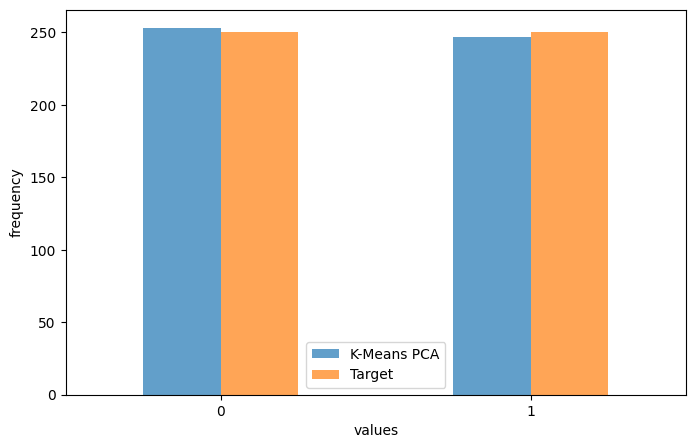

In [304]:
counts_kmeans = df_pca_kmeans['kmeans_pca'].value_counts().sort_index()
counts_target = df_pca_kmeans['target'].value_counts().sort_index()

df_counts = pd.DataFrame({'K-Means PCA': counts_kmeans, 'Target': counts_target}).fillna(0)

df_counts.plot(kind='bar', figsize=(8, 5), alpha=0.7)
plt.xlabel("values")
plt.ylabel("frequency")
plt.legend(["K-Means PCA", "Target"])
plt.xticks(rotation=0)  
plt.show()


In [305]:
print(confusion_matrix(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

[[207  43]
 [ 46 204]]


In [306]:
print(classification_report(df_pca_kmeans['target'],df_pca_kmeans['kmeans_pca']))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       250
           1       0.83      0.82      0.82       250

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



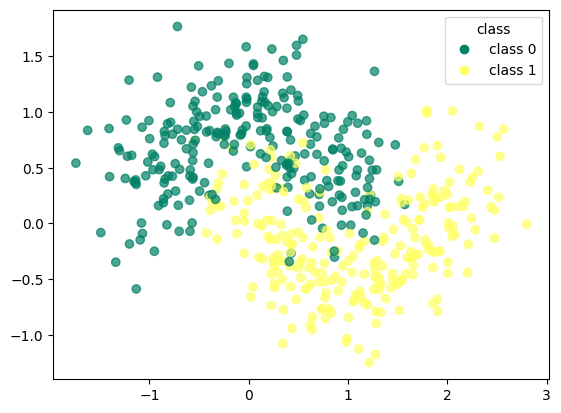

In [307]:
from matplotlib.lines import Line2D

scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements, title="class")
plt.show()

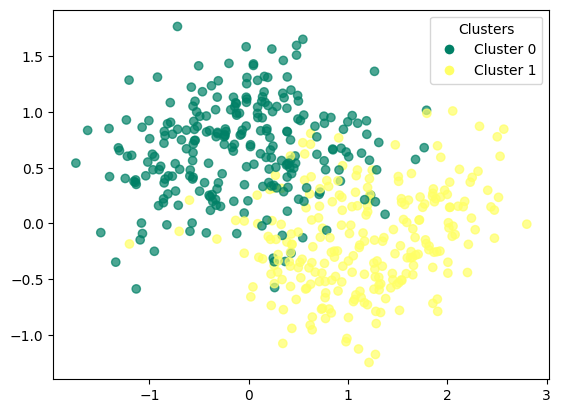

In [308]:
scatter = plt.scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

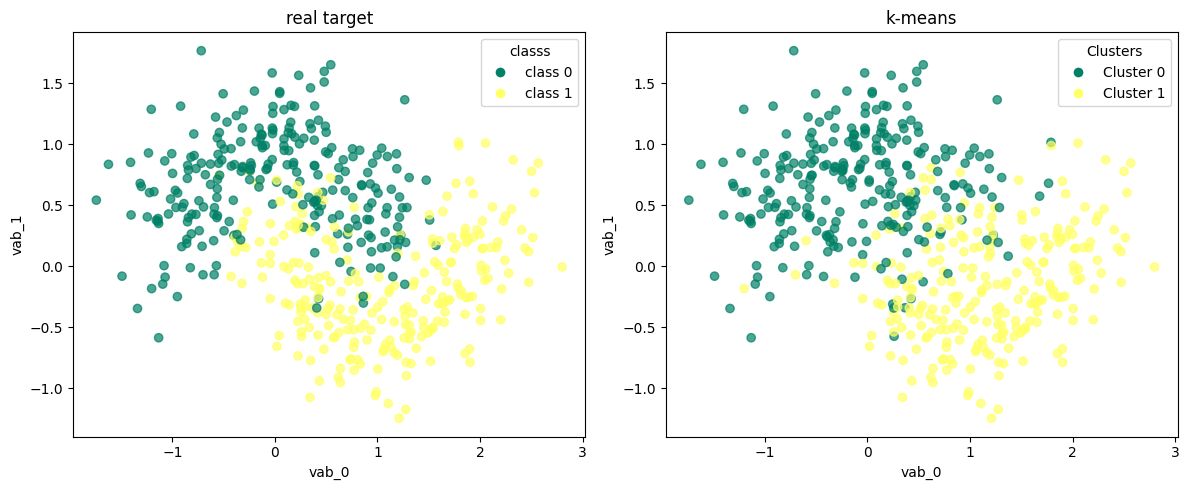

In [309]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 1], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

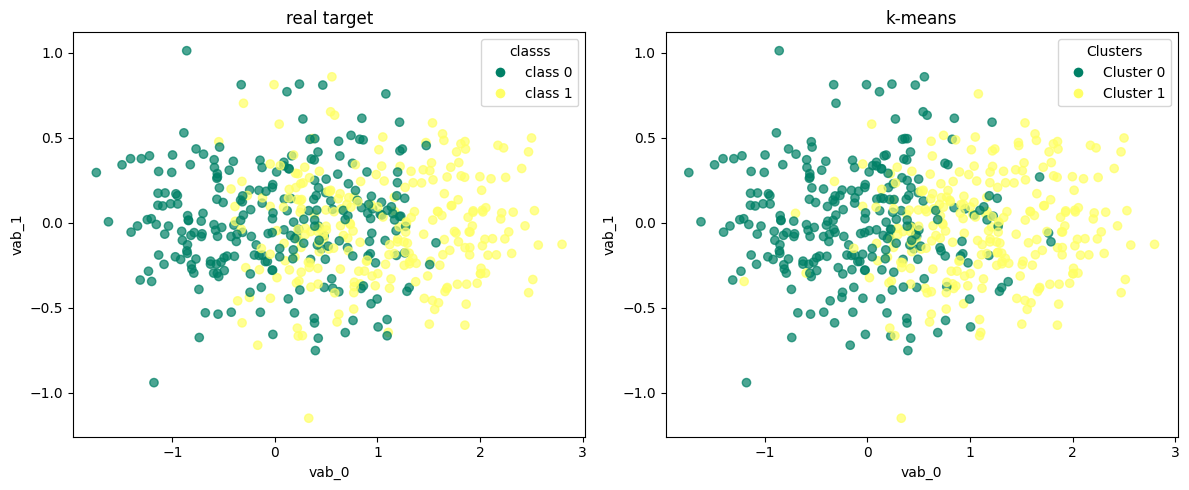

In [310]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

scatter1 = axes[0].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['target'], cmap='summer', alpha=0.7)

unique_labels = np.unique(df_pca_kmeans['target'])
legend_elements1 = [Line2D([0], [0], marker='o', color='w', label=f'class {label}',
                           markerfacecolor=scatter1.cmap(scatter1.norm(label)), markersize=8) 
                    for label in unique_labels]
axes[0].legend(handles=legend_elements1, title="classs")
axes[0].set_title("real target")

scatter2 = axes[1].scatter(df_pca_kmeans.iloc[:, 0], df_pca_kmeans.iloc[:, 2], 
                           c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)

unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements2 = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                           markerfacecolor=scatter2.cmap(scatter2.norm(cluster)), markersize=8) 
                    for cluster in unique_clusters]
axes[1].legend(handles=legend_elements2, title="Clusters")
axes[1].set_title("k-means")

for ax in axes:
    ax.set_xlabel("vab_0")
    ax.set_ylabel("vab_1")

plt.tight_layout()  
plt.show()

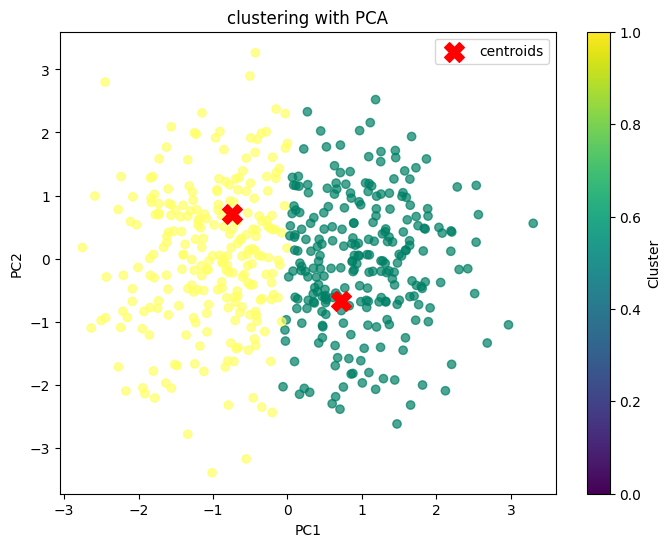

In [311]:
plt.figure(figsize=(8, 6))
plt.scatter(final_df['principal component 1'], final_df['principal component 2'] , c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='centroids')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('clustering with PCA')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

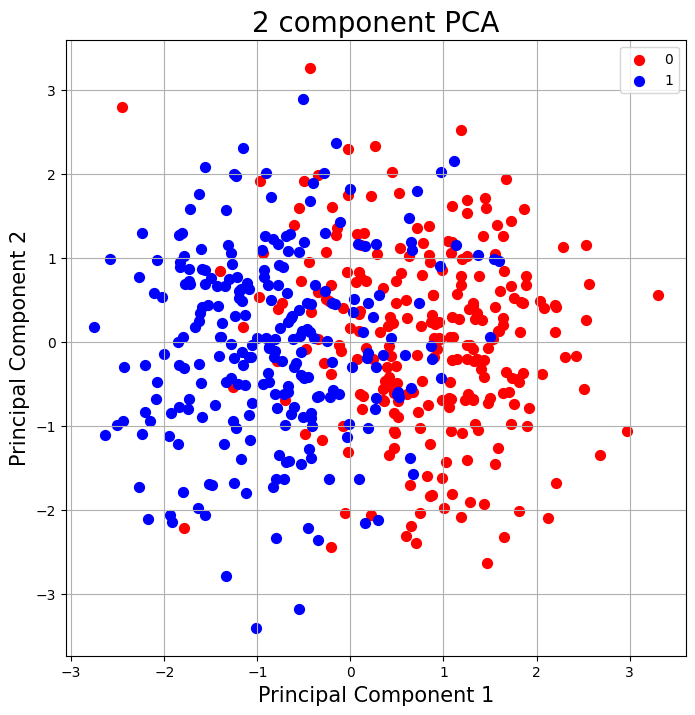

In [312]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1',fontsize = 15)
ax.set_ylabel('Principal Component 2',fontsize = 15)
ax.set_title('2 component PCA',fontsize = 20)

targets = [0,1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               ,final_df.loc[indicesToKeep, 'principal component 2']
               ,c = color
               ,s = 50)
ax.legend(targets)
ax.grid()

# non linear dataset - circles

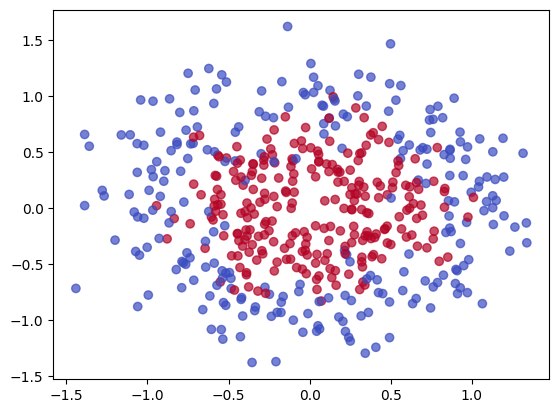

In [313]:
X, y = make_circles(n_samples=500, noise=0.2, factor=0.5, random_state=42)

num_extra_features = 10
extra_features = np.random.normal(scale=0.5, size=(X.shape[0], num_extra_features))
X_extended = np.hstack((X, extra_features))

df3 = pd.DataFrame(X_extended, columns=[f"Feature_{i+1}" for i in range(X_extended.shape[1])])
df3["Target"] = y

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.show()

In [ ]:
df3

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0    -0.469004   0.323509   0.318454  -0.237563  -0.266497   0.319951   
1     0.125867   1.048157  -0.598979  -0.213286  -0.194702   0.677903   
2    -0.386288   0.042201   0.867021   0.192105   0.053880  -0.124947   
3    -0.494481  -0.578267  -0.488969  -0.306211  -0.989509   1.013409   
4    -0.714102   0.865415   0.057238  -0.054264   0.413419  -0.052005   
..         ...        ...        ...        ...        ...        ...   
495  -0.854312   0.509894  -0.341930  -0.912756   0.528522  -0.347915   
496   0.600061  -0.021119   0.021563   0.150966  -0.324538  -0.465583   
497  -0.715531   0.630037  -0.306627  -0.169454   0.725170  -0.561075   
498  -0.318829  -0.743461  -0.290178   0.973664   0.133848   0.426555   
499  -1.042015   0.962384  -0.424183  -0.291671   0.051483  -0.313250   

     Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0     0.357618  -0.196676  -0.793594   -0.103658    0.311763    0.902708   
1    -0.017471  -0.453663   0.279348   -0.202319   -0.612194   -0.446387   
2     0.146074   0.140118   0.146084    0.057423    0.434399    0.011552   
3     0.431377  -0.415035  -0.140922   -0.318438    0.771274   -0.709939   
4    -0.879104  -0.125559  -0.486081    0.039790    0.717089   -0.869713   
..         ...        ...        ...         ...         ...         ...   
495   0.597971   0.440873   0.278359    0.306442   -0.307657    0.928925   
496   0.238648   0.108757  -0.394676   -0.719213   -0.634962    0.598067   
497  -0.363497  -0.384383   0.809034    0.996692    0.375782    0.391692   
498  -0.052762  -0.134016   0.831521    0.269862    0.725688    0.127664   
499  -0.553731   0.600709  -0.272435    0.069096    0.148067   -0.294077   

     Target  
0         1  
1         0  
2         1  
3         0  
4         0  
..      ...  
495       0  
496       1  
497       1  
498       1  
499       0  

[500 rows x 13 columns]